Support Vector Machines (SVMs) are powerful supervised machine learning models used for classification and regression tasks. In this tutorial, I'll explain the basics of SVMs for classification using Python with the help of the popular library scikit-learn.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#loading the iris data sets
iris = datasets.load_iris()
X = iris.data[:,:2]  #use the first two features
y =iris.target

In [4]:
#Splitting the data into training and test sets
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
#Creating the SVM classifier - linear ,RBF, Polynomial kernel, Sigmoid kernel
svm_classifier_linear = SVC(kernel='linear',random_state=42)
svm_classifier_RBF = SVC(kernel='rbf',random_state=42)
svm_classifier_polynomial = SVC(kernel='poly',random_state=42)
svm_classifier_sigmoid = SVC(kernel='sigmoid',random_state=42)


In [24]:
#fitting the model
svm_classifier_linear.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [25]:
#make predictions using the linear model
y_pred = svm_classifier_linear.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test,y_pred)
conf_marix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)


#Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix score: {conf_marix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9
Confusion Matrix score: [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



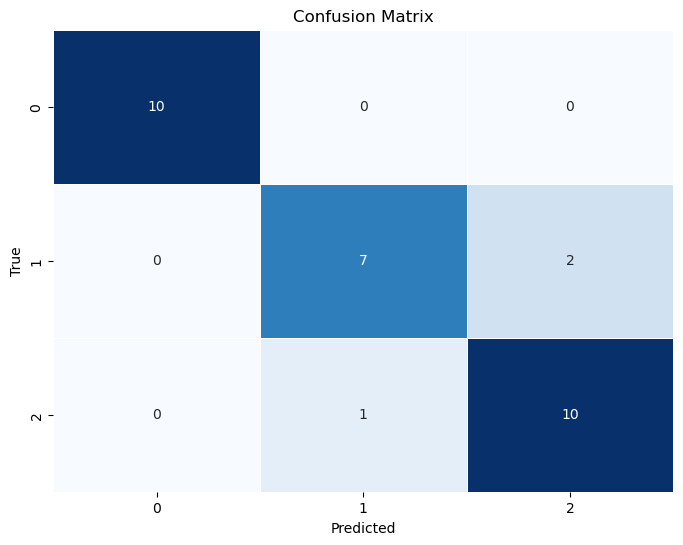

In [27]:
#Displaying the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(conf_marix,annot=True,fmt="d",cmap="Blues",linewidths=0.5,cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

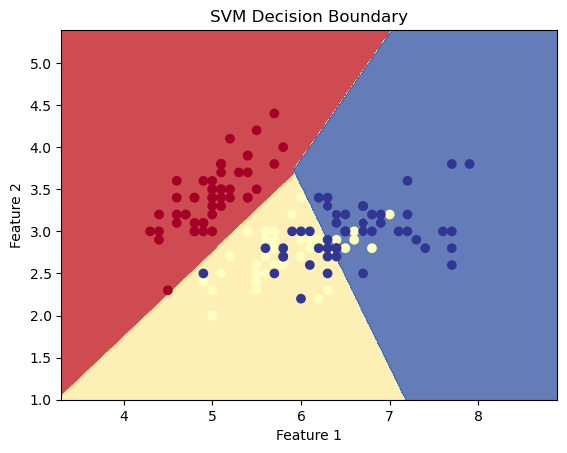

In [30]:
# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh
Z = svm_classifier_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()
